Clinic 2016 to 2021

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import seaborn as sns
colors = ['#b166eb', '#8858D4', '#664CC1', '#4B43B2', '#072B8B']
sns.set_palette(colors)

from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection 
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score

from sklearn.preprocessing import LabelEncoder

# from scipy.stats import 
# import statsmodels.api as sm

In [3]:
cln = pd.read_csv('data/cln_2016_21.csv')

In [4]:
cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76106 entries, 0 to 76105
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patientid                         76106 non-null  object 
 1   patientdob                        76106 non-null  object 
 2   patient_age                       76106 non-null  int64  
 3   patient_zip                       76106 non-null  object 
 4   race                              76094 non-null  object 
 5   multiple_races                    76094 non-null  object 
 6   ethnicity                         76089 non-null  object 
 7   _cncrns_bt_mtng_bsc_nds__fd_____  32179 non-null  object 
 8   cln_enc_id                        76106 non-null  int64  
 9   enc_Ht_date                       76106 non-null  object 
 10  enc_Ht                            76106 non-null  object 
 11  enc_Wt_date                       76106 non-null  object 
 12  enc_

In [156]:
len(cln.labrdocid.unique())

40682

In [5]:
crafft = cln.loc[(cln['order_name__single_']=='CRAFFT, SUBSTANCE ABUSE SCREENING FOR ADOLESCENTS*')]
crafft.labvalue.unique(), crafft.labvalue.value_counts(), crafft.labvalue.isnull().sum()

(array(['negative', nan, 'positive'], dtype=object),
 negative    13643
 positive     1136
 Name: labvalue, dtype: int64,
 343)

In [6]:
phq = cln.loc[(cln['order_name__single_']=='PATIENT HEALTH QUESTIONNAIRE-9*')]
phq.labvalue.unique(), phq.labvalue.value_counts(), phq.labvalue.isnull().sum()

(array(['0', 'negative', '14', 'positive', '2', '1', nan, '3', '4', '9',
        '11', '6', '19', '5', '8', '16', '7', '10', '15', '18/20', '18',
        '21', '13', '20', '18 - severe', '27', '24', '12', '25', '23',
        '17', 'o', '22', 'O', '1.5', '26'], dtype=object),
 negative       6325
 0              3255
 1               819
 2               746
 3               505
 positive        501
 4               320
 6               199
 5               193
 7               156
 8                99
 9                98
 11               77
 10               66
 12               64
 13               41
 14               40
 15               31
 16               18
 18               17
 19               13
 o                12
 20               10
 17                6
 21                6
 O                 2
 22                2
 26                2
 25                2
 24                2
 23                1
 27                1
 18 - severe       1
 1.5               1
 18/20    

In [7]:
phq_mfa = cln.loc[(cln['order_name__single_']=='PATIENT HEALTH QUESTIONNAIRE MODIFIED FOR ADOLESCENTS*')]
phq_mfa.labvalue.unique()

array(['0', 'negative', '3', '1', 'INCOMPLETE', '10', 'positive', '2',
       '8', '4', '19', '21', 'Just Health', '4/0/5', '11/0/10', nan, '13',
       'Positive for anxiety; long discussion with patient re: resources. He wants to re-engage with this in the fall. He will f/u sooner if any questions or concerns.',
       '9', '6/0/5', '17', '18', 'gad 7 = 18', '5', '14',
       'CRAFFT 1, GAD7 result 0', 'CRAFFT 0, GAD7 result 0', 'gad7 = 0',
       'gad 7 = 0', '15', 'Refer to BHP',
       'Scared = 75. Saw BHP yestereday and will see BHP tomorrow.', '24',
       '25', 'CRAFFT 1, GAD 7 result 5', 'PHQ 0', '6',
       'CRAFFT 0, GAD7 result 1', 'CRAFFT 2, GAD 7results 13', '16',
       'Mild improvement from 16 last month', '12',
       'CRAFFT 1, GAD7 result 11; After discussion, feel more tied to sleep issues and physical symptoms.',
       '7', 'Mild', 'CRAFFT 1, GAD7 results 12',
       'CRAFFT 3, GAD7 result 10', 'Gad 7= 3.', 'Mild Depression',
       'Gad7 =  6', 'CRAFFT 3, GAD7 

In [8]:
ts = cln.loc[(cln['order_name__single_']=='TEENSCREEN QUESTIONNAIRE*')]
ts.labvalue.unique()

array(['No', nan, 'Patient did not answer question', 'Yes', "Don't Know"],
      dtype=object)

In [9]:
crafft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15122 entries, 0 to 76103
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patientid                         15122 non-null  object 
 1   patientdob                        15122 non-null  object 
 2   patient_age                       15122 non-null  int64  
 3   patient_zip                       15122 non-null  object 
 4   race                              15121 non-null  object 
 5   multiple_races                    15121 non-null  object 
 6   ethnicity                         15118 non-null  object 
 7   _cncrns_bt_mtng_bsc_nds__fd_____  6439 non-null   object 
 8   cln_enc_id                        15122 non-null  int64  
 9   enc_Ht_date                       15122 non-null  object 
 10  enc_Ht                            15122 non-null  object 
 11  enc_Wt_date                       15122 non-null  object 
 12  enc_

In [10]:
# Remove empty columns
crafft.drop(columns=['chrt_epsd_id', 'labanalyte', 'labinterpretation', 'clm_sldng_fee_ins_pkg_name', 'enc_Ht', 'enc_Wt'], inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
# Inspect columns with high NaNs
crafft.isnull().sum() / len(crafft) * 100

patientid                            0.000000
patientdob                           0.000000
patient_age                          0.000000
patient_zip                          0.000000
race                                 0.006613
multiple_races                       0.006613
ethnicity                            0.026452
_cncrns_bt_mtng_bsc_nds__fd_____    57.419653
cln_enc_id                           0.000000
enc_Ht_date                          0.000000
enc_Wt_date                          0.000000
enc_BMI_date                         0.000000
enc_BMI                              0.105806
order_id                             0.000000
labrdocid                            0.231451
order_chartdate                      0.000000
order_name__single_                  0.000000
labvalue                             2.268218
svc_dprtmnt                          0.000000
age_at_dos                           0.000000
primary_clm_ins_pkg_name             0.000000
primary_clm_ins_pkg_name.1        

In [12]:
crafft.primary_clm_ins_pkg_name.unique() == crafft['primary_clm_ins_pkg_name.1'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [13]:
crafft.drop(columns=['patientid', 'patientdob', 'patient_zip', 'enc_Ht_date', 
                 'enc_Wt_date', 'enc_BMI_date', 'enc_BMI', 'order_id', 'labrdocid', 
                 'order_chartdate', 'primary_clm_ins_pkg_name', 'multiple_races', 'cln_enc_id'], inplace=True)

In [14]:
crafft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15122 entries, 0 to 76103
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   patient_age                       15122 non-null  int64 
 1   race                              15121 non-null  object
 2   ethnicity                         15118 non-null  object
 3   _cncrns_bt_mtng_bsc_nds__fd_____  6439 non-null   object
 4   order_name__single_               15122 non-null  object
 5   labvalue                          14779 non-null  object
 6   svc_dprtmnt                       15122 non-null  object
 7   age_at_dos                        15122 non-null  int64 
 8   primary_clm_ins_pkg_name.1        15122 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.2+ MB


In [15]:
crafft.drop(columns=['_cncrns_bt_mtng_bsc_nds__fd_____'], inplace=True)

In [16]:
crafft.drop(columns=['patient_age'], inplace=True)

In [17]:
crafft.race.replace(to_replace={'Black': 'Black or African American', 'African American': 'Black or African American', 
                               'American Indian': 'American Indian or Alaska Native', 
                               'Arab': 'Asian', 'Mexican American Indian': 'American Indian or Alaska Native'}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [18]:
crafft.race.unique()

array(['Patient Declined', 'White', 'American Indian or Alaska Native',
       'Black or African American', 'Asian',
       'Native Hawaiian or Other Pacific Islander', 'Other Race', nan],
      dtype=object)

In [19]:
crafft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15122 entries, 0 to 76103
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   race                        15121 non-null  object
 1   ethnicity                   15118 non-null  object
 2   order_name__single_         15122 non-null  object
 3   labvalue                    14779 non-null  object
 4   svc_dprtmnt                 15122 non-null  object
 5   age_at_dos                  15122 non-null  int64 
 6   primary_clm_ins_pkg_name.1  15122 non-null  object
dtypes: int64(1), object(6)
memory usage: 945.1+ KB


In [20]:
crafft.dropna(axis=0, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [21]:
crafft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14775 entries, 0 to 76103
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   race                        14775 non-null  object
 1   ethnicity                   14775 non-null  object
 2   order_name__single_         14775 non-null  object
 3   labvalue                    14775 non-null  object
 4   svc_dprtmnt                 14775 non-null  object
 5   age_at_dos                  14775 non-null  int64 
 6   primary_clm_ins_pkg_name.1  14775 non-null  object
dtypes: int64(1), object(6)
memory usage: 923.4+ KB


In [33]:
crafft.drop(columns='ethnicity', inplace=True)

In [42]:
crafft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14775 entries, 0 to 76103
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   race                        14775 non-null  object
 1   order_name__single_         14775 non-null  object
 2   labvalue                    14775 non-null  object
 3   svc_dprtmnt                 14775 non-null  object
 4   age_at_dos                  14775 non-null  int64 
 5   primary_clm_ins_pkg_name.1  14775 non-null  object
dtypes: int64(1), object(5)
memory usage: 808.0+ KB


In [27]:
crafft.svc_dprtmnt.replace(to_replace= {'Aurora CONF': 'Aurora', 'Health & Wellness Center at Centennial High School': 'Centennial High School', 'CHS CONF': 'Centennial High School',
                           'Dolores CONF': 'Dolores', 'Laredo CONF': 'Laredo', 
                           'Thornton CONF': 'Thornton', 'Thornton Telehealth': 'Thornton', 
                           'RFHS CONF': 'Roaring Fork High School', 'Dental- Aurora': 'Aurora', 
                           'Denver CONF': 'Denver', 'Aurora Telehealth': 'Aurora', 
                           'BES CONF': 'Basalt Elementary School', 'Dental - Denver': 'Denver', 
                           'Laredo CONF': 'Laredo', 'BHS CONF': 'Basalt High School', 
                           'BMS CONF': 'Basalt Middle School', 'Central CONF': 'Central', 
                                       'SWOS CONF': 'SWOS', 'Dental- Thornton': 'Thornton',
                                       'Gateway CONF': 'Gateway'}, inplace=True)

In [45]:
crafft.labvalue.value_counts()
crafft.labvalue.replace(to_replace= {'negative': 0, 'positive': 1}, inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6610: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [47]:
crafft.drop(columns='order_name__single_', inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4908: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [48]:
crafft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14775 entries, 0 to 76103
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   race                        14775 non-null  object
 1   labvalue                    14775 non-null  int64 
 2   svc_dprtmnt                 14775 non-null  object
 3   age_at_dos                  14775 non-null  int64 
 4   primary_clm_ins_pkg_name.1  14775 non-null  object
dtypes: int64(2), object(3)
memory usage: 692.6+ KB


In [54]:
crafft.race.unique()

array([5, 6, 0, 2, 1, 3, 4])

In [51]:
le = LabelEncoder()

In [53]:
crafft['race'] = le.fit_transform(crafft.race.values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [59]:
race_dict = {l: i for (i, l) in enumerate(le.classes_)}


In [60]:
race_dict

{'American Indian or Alaska Native': 0,
 'Asian': 1,
 'Black or African American': 2,
 'Native Hawaiian or Other Pacific Islander': 3,
 'Other Race': 4,
 'Patient Declined': 5,
 'White': 6}

In [61]:
crafft['svc_dprtmnt'] = le.fit_transform(crafft.svc_dprtmnt.values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [62]:
svcdept_dict = {l: i for (i, l) in enumerate(le.classes_)}


In [63]:
svcdept_dict

{'Aurora': 0,
 'Basalt Elementary School': 1,
 'Basalt High School': 2,
 'Basalt Middle School': 3,
 'Centennial High School': 4,
 'Central': 5,
 'Crawford': 6,
 'Denver': 7,
 'Dolores': 8,
 'Gateway': 9,
 'Lakewood': 10,
 'Laredo': 11,
 'Roaring Fork High School': 12,
 'SWOS': 13,
 'Thornton': 14}

In [64]:
crafft['primary_clm_ins_pkg_name.1'] = le.fit_transform(crafft['primary_clm_ins_pkg_name.1'].values)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
ins_dict = {l: i for (i, l) in enumerate(le.classes_)}


In [66]:
ins_dict

{'*SELF PAY*': 0,
 'ABC GRANT': 1,
 'ASRM - MultiPlan': 2,
 'Administrative Concepts': 3,
 'Administrative Concepts (PPO)': 4,
 'Administrative Concepts - First Health (PPO)': 5,
 'Aetna': 6,
 'Aetna (EPO)': 7,
 'Aetna (HMO)': 8,
 'Aetna (Indemnity)': 9,
 'Aetna (POS II)': 10,
 'Aetna (POS)': 11,
 'Aetna (PPO)': 12,
 'Aetna International - Aetna (PPO)': 13,
 'Aetna Signature Administrators - GEHA - GEHA (PPO)': 14,
 'Aliera Healthcare - MultiPlan (PPO)': 15,
 'Aliera Healthcare - PHCS (PPO)': 16,
 'All Savers - United Healthcare (EPO)': 17,
 'All Savers - United Healthcare (PPO)': 18,
 'BCBS-AL (PPO)': 19,
 'BCBS-CA Blue Cross of California': 20,
 'BCBS-CA Blue Cross of California (PPO)': 21,
 'BCBS-CA Blue Shield of California': 22,
 'BCBS-CA Blue Shield of California - FEP': 23,
 'BCBS-CO': 24,
 'BCBS-CO (HMO)': 25,
 'BCBS-CO (POS)': 26,
 'BCBS-CO (PPO)': 27,
 'BCBS-CO - FEP': 28,
 'BCBS-GA': 29,
 'BCBS-GA (PPO)': 30,
 'BCBS-ID Blue Cross': 31,
 'BCBS-ID Blue Cross - FEP': 32,
 'BCBS

In [67]:
df = crafft.copy()

In [68]:
y = df.pop('labvalue')

In [79]:
y.sum(), len(X)

(1136, 14775)

In [69]:
X = df.copy()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

In [128]:
def run_experiments(X_train: pd.DataFrame, y_train: pd.DataFrame, 
                   X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame: 
    dfs = []
    models = [
        ('LogReg', LogisticRegression()),
        ('RF', RandomForestClassifier(class_weight='balanced')), 
        ('KNN', KNeighborsClassifier()), 
        ('SVM', SVC()), 
        ('GNB', GaussianNB()), 
        ('XGB', XGBClassifier())
    ]
    results = []
    names = []
    scoring = ['accuracy', 'precision', 'recall', 
               'f1', 'roc_auc']
    target_names = ['Negative CRAFFT', 'Positive CRAFFT']
    for name, model in models: 
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, 
                                   target_names = target_names))
        results.append(cv_results)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    
    final = pd.concat(dfs, ignore_index=True)
    return final

In [74]:
exps = run_experiments(X_train, y_train, X_test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


LogReg
                 precision    recall  f1-score   support

Negative CRAFFT       0.92      1.00      0.96      2728
Positive CRAFFT       1.00      0.01      0.02       227

       accuracy                           0.92      2955
      macro avg       0.96      0.50      0.49      2955
   weighted avg       0.93      0.92      0.89      2955

RF
                 precision    recall  f1-score   support

Negative CRAFFT       0.95      0.75      0.84      2728
Positive CRAFFT       0.15      0.53      0.24       227

       accuracy                           0.74      2955
      macro avg       0.55      0.64      0.54      2955
   weighted avg       0.89      0.74      0.79      2955

KNN
                 precision    recall  f1-score   support

Negative CRAFFT       0.93      0.99      0.96      2728
Positive CRAFFT       0.37      0.07      0.12       227

       accuracy                           0.92      2955
      macro avg       0.65      0.53      0.54      2955
   weight

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedM

SVM
                 precision    recall  f1-score   support

Negative CRAFFT       0.92      1.00      0.96      2728
Positive CRAFFT       0.00      0.00      0.00       227

       accuracy                           0.92      2955
      macro avg       0.46      0.50      0.48      2955
   weighted avg       0.85      0.92      0.89      2955

GNB
                 precision    recall  f1-score   support

Negative CRAFFT       0.92      0.99      0.96      2728
Positive CRAFFT       0.24      0.03      0.05       227

       accuracy                           0.92      2955
      macro avg       0.58      0.51      0.50      2955
   weighted avg       0.87      0.92      0.89      2955

[21:28:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/xgboost/skle

[21:28:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:05] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:28:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
                 precision    recall  f1-score   support

Negative CRAFFT       0.93      0.99      0.96      2728
Positive CRAFFT       0.51      0.10      0.16       227

       accuracy                           0.92      2955
      macro avg       0.72      0.54      0.56      2955
   weighted avg       0.90      0.92      0.90      2955



In [80]:
exps

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.051273,0.011536,0.928511,0.933624,0.928511,0.894510,0.692827,LogReg
1,0.039366,0.007405,0.916244,0.840245,0.916244,0.876600,0.706329,LogReg
2,0.032755,0.008569,0.926396,0.858209,0.926396,0.891000,0.711952,LogReg
3,0.032733,0.006964,0.931049,0.866852,0.931049,0.897805,0.674840,LogReg
4,0.031814,0.007859,0.913283,0.834085,0.913283,0.871889,0.709639,LogReg
5,0.441871,0.084087,0.776227,0.894450,0.776227,0.823333,0.683429,RF
6,0.506246,0.080234,0.747039,0.878988,0.747039,0.797897,0.673211,RF
7,0.432498,0.094899,0.771151,0.885224,0.771151,0.817798,0.676498,RF
8,0.437189,0.086491,0.735618,0.893861,0.735618,0.797325,0.674908,RF
9,0.450046,0.092287,0.747039,0.871556,0.747039,0.795673,0.668934,RF


In [81]:
# Logistic Regression wins for training speed and metrics

In [86]:
lr = LogisticRegression(random_state=42)

In [96]:
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 
               'f1_weighted', 'roc_auc']

In [97]:
lr_cv_results = model_selection.cross_validate(lr, X_train, y_train, cv=kfold, scoring=scoring)
clf = lr.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))

Accuracy: 0.9238578680203046
Precision: 1.0
Recall: 0.00881057268722467
F1: 0.017467248908296942


In [87]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [88]:
preds = lr.predict(X_test)

In [89]:
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1:", f1_score(y_test, preds))

Accuracy: 0.9238578680203046
Precision: 1.0
Recall: 0.00881057268722467
F1: 0.017467248908296942


In [90]:
xgb = XGBClassifier(random_state=42)

In [91]:
xgb.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:34:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [92]:
preds = xgb.predict(X_test)

In [93]:
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1:", f1_score(y_test, preds))

Accuracy: 0.9235194585448393
Precision: 0.5116279069767442
Recall: 0.09691629955947137
F1: 0.16296296296296298


In [111]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [112]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [113]:
steps = [('o', over), ('u', under)]

In [114]:
pipeline = Pipeline(steps=steps)

In [115]:
X, y = pipeline.fit_resample(X, y)

In [117]:
from collections import Counter

In [118]:
counter = Counter(y)
print(counter)

Counter({0: 2726, 1: 1363})


In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)

In [125]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3271, 4), (818, 4), (3271,), (818,))

In [127]:
y_test.sum()/len(y_test), y_train.sum()/len(y_train)

(0.33374083129584353, 0.3332314276979517)

In [129]:
exps2 = run_experiments(X_train, y_train, X_test, y_test)

LogReg
                 precision    recall  f1-score   support

Negative CRAFFT       0.71      0.92      0.80       545
Positive CRAFFT       0.62      0.26      0.37       273

       accuracy                           0.70       818
      macro avg       0.67      0.59      0.58       818
   weighted avg       0.68      0.70      0.66       818

RF
                 precision    recall  f1-score   support

Negative CRAFFT       0.79      0.70      0.74       545
Positive CRAFFT       0.51      0.63      0.56       273

       accuracy                           0.67       818
      macro avg       0.65      0.66      0.65       818
   weighted avg       0.69      0.67      0.68       818

KNN
                 precision    recall  f1-score   support

Negative CRAFFT       0.74      0.82      0.78       545
Positive CRAFFT       0.55      0.44      0.49       273

       accuracy                           0.69       818
      macro avg       0.64      0.63      0.63       818
   weight

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision 

SVM
                 precision    recall  f1-score   support

Negative CRAFFT       0.67      1.00      0.80       545
Positive CRAFFT       0.00      0.00      0.00       273

       accuracy                           0.67       818
      macro avg       0.33      0.50      0.40       818
   weighted avg       0.44      0.67      0.53       818

GNB
                 precision    recall  f1-score   support

Negative CRAFFT       0.70      0.91      0.79       545
Positive CRAFFT       0.55      0.22      0.32       273

       accuracy                           0.68       818
      macro avg       0.63      0.57      0.56       818
   weighted avg       0.65      0.68      0.63       818

[22:18:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.7/site-packages/xgboost/skle

[22:18:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:18:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:18:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB
                 precision    recall  f1-score   support

Negative CRAFFT       0.73      0.90      0.81       545
Positive CRAFFT       0.63      0.3

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [130]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [131]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [132]:
preds = rf.predict(X_test)

In [133]:
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1:", f1_score(y_test, preds))


Accuracy: 0.6748166259168704
Precision: 0.5104477611940299
Recall: 0.6263736263736264
F1: 0.5625000000000001


In [134]:
rf.feature_importances_

array([0.12729807, 0.2752991 , 0.3345753 , 0.26282754])

In [135]:
important_features = pd.Series(data=rf.feature_importances_, index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

age_at_dos                    0.334575
svc_dprtmnt                   0.275299
primary_clm_ins_pkg_name.1    0.262828
race                          0.127298
dtype: float64

In [140]:
param_grid = {'n_estimators': [140, 150, 175, 300], 'criterion': ['gini', 'entropy']}

In [141]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [142]:
skf = StratifiedKFold()

In [143]:
grid_rf = GridSearchCV(rf, param_grid, cv=skf)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [140, 150, 175]})

In [144]:
grid_rf.best_estimator_

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=175, random_state=42)

In [145]:
rf_hyp = RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=175, random_state=42)

In [146]:
rf_hyp.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=175, random_state=42)

In [148]:
preds = rf_hyp.predict(X_test)

In [149]:
print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1:", f1_score(y_test, preds))


Accuracy: 0.6748166259168704
Precision: 0.5104477611940299
Recall: 0.6263736263736264
F1: 0.5625000000000001


In [152]:
cf = confusion_matrix(y_test, preds)
cf

array([[381, 164],
       [102, 171]])

In [153]:
thresholds = np.linspace(0, 1, 100)
thresholds = thresholds.round(2)
accuracy = []
recall = []
precision = []
f1 = []
df = pd.DataFrame(index=thresholds)
for thresh in thresholds: 
    pred_prob = rf.predict_proba(X_test)
    predicted = (pred_prob[:, 1] >= thresh).astype('int')
    acc = accuracy_score(y_test, predicted)
    rec = recall_score(y_test, predicted)
    prec = precision_score(y_test, predicted)
    f1sc = f1_score(y_test, predicted)
    accuracy.append(acc)
    recall.append(rec)
    precision.append(prec)
    f1.append(f1sc)

df['accuracy'] = accuracy
df['recall'] = recall
df['precision'] = precision
df['f1'] = f1

Text(0.5, 0, 'Classification Thresholds')

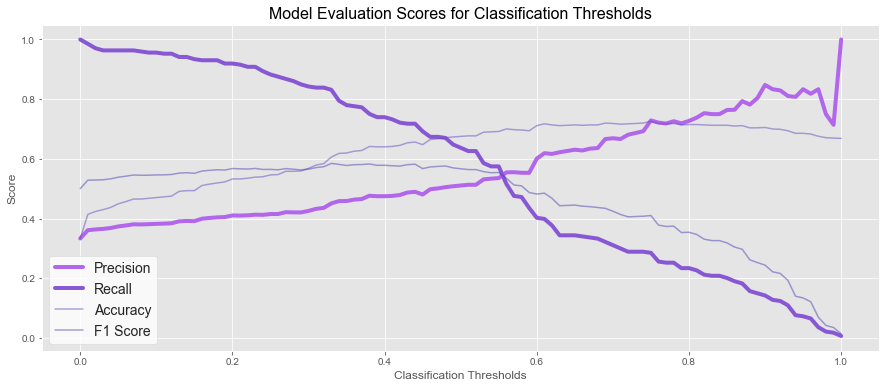

In [154]:
fig, ax = plt.subplots(figsize=(15, 6))
sns.set_style('whitegrid')

sns.lineplot(x=thresholds, y=precision, ax=ax, color=colors[0], label='Precision', linewidth=4)
sns.lineplot(x=thresholds, y=recall, ax=ax, color=colors[1], label='Recall', linewidth=4)
sns.lineplot(x=thresholds, y=accuracy, ax=ax, color=colors[2], label='Accuracy', alpha=0.5)
sns.lineplot(x=thresholds, y=f1, ax=ax, color=colors[3], label='F1 Score', alpha=0.5)
ax.set_title('Model Evaluation Scores for Classification Thresholds', fontsize=16)
ax.legend(fontsize=14)
ax.set_ylabel('Score')
ax.set_xlabel('Classification Thresholds')